In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = symbols('x')
f = x - 0.2 * sin(x + 0.5)
f

x - 0.2*sin(x + 0.5)

# Завдання 1 
## Побудувати графік початкової функції f(x) = 0 з намаганням обрати інтервал побудови графіку таким чином, щоб можна було спостерігати наявність дійсних коренів. В іншому випадку перетворити функцію штучно так, щоб у неї з’явився хоча б один дійсний корінь. Інформацію про перетворення функції обов’язково подати у звіті з лабораторної роботи. Визначити інтервал ізоляції дійсного кореня початкового або перетвореного рівняння. У разі наявності множини коренів обрати один з них на свій розсуд.


In [3]:
from scipy.optimize import fsolve

f_numeric = lambdify(x, f)
sol = fsolve(f_numeric, 0)
print('Корінь = ', *sol)


Корінь =  0.11546816948996555


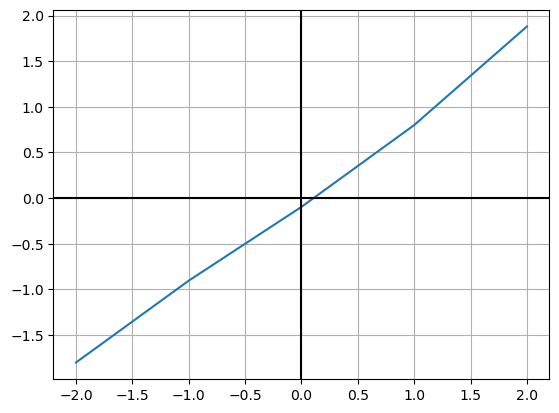

In [4]:
x_vals = np.linspace(-2, 2, 5)

f_vals = [N(f.subs(x, val)) for val in x_vals]

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals)


plt.grid()
ax.axhline(0, color='black', lw=1.5)
ax.axvline(0, color='black', lw=1.5)

plt.show()

### Маємо один дійсний корень. На свій розсуд оберемо інтервал ізоляції цього кореня [-0.4, 0.4]

# Завдання 2
## Обчислити наближені значення коренів вручну, виконавши 3-4 ітерації (до встановлення факту збіжності) методами, номери яких позначені.
 ### 1) метод простої ітерації;             2) релаксаційний метод;
 ### 3) метод Ньютона;                  4) метод січних;
 ### 5) метод хорд;                     6) комбінований метод;
 ### 7) метод Мюллера.


# Метод Ньютона

In [27]:
f1 = f.diff(x)
f2 = f1.diff(x)
print(f)
print(f1)
print(f2)

x - 0.2*sin(x + 0.5)
1 - 0.2*cos(x + 0.5)
0.2*sin(x + 0.5)


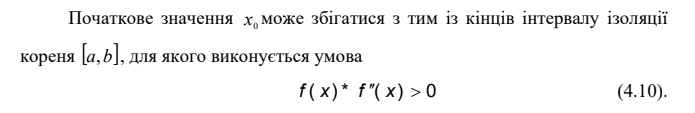

### Якщо визначити для нашого кореня інтервал ізоляції як [-0.4, 0.4] і визначити x0, то умова  f( x )* f′′( x ) > 0 буде справедливою для точки х = 0.4

In [30]:
f.subs(x, 0.4) * f2.subs(x, 0.4)

0.0381221108763369

In [89]:
x0 = 0.4  
epsilon = 0.001  
iteration = 0

In [90]:
x_prev = x0
x_next = x_prev - f.subs(x, x_prev)/f1.subs(x, x_prev)
iteration += 1
print('Ітерація:', iteration)
print(x_next)
if abs(x_next - x_prev) > epsilon:
    print('Збіжність не досягнута')
else:
    print('Збіжність досягнута')
        
x_prev = x_next
x_next = x_prev - f.subs(x, x_prev)/f1.subs(x, x_prev)
iteration += 1
print('Ітерація:', iteration)
print(x_next)
if abs(x_next - x_prev) > epsilon:
    print('Збіжність не досягнута')
else:
    print('Збіжність досягнута')
    
x_prev = x_next
x_next = x_prev - f.subs(x, x_prev)/f1.subs(x, x_prev)
iteration += 1
print('Ітерація:', iteration)
print(x_next)
if abs(x_next - x_prev) > epsilon:
    print('Збіжність не досягнута')
else:
    print('Збіжність досягнута')
    

Ітерація: 1
0.122118614021244
Збіжність не досягнута
Ітерація: 2
0.115471237620098
Збіжність не досягнута
Ітерація: 3
0.115468169490615
Збіжність досягнута


### Бачимо, що 3 ітерацій достатньо задля досягнення збіжності методом Ньютона з початковим наближенням х = 0.4

# Завдання 3 
## Скласти програму для розв’язання рівняння з точністю ε=0.001 позначеними методами. Змінюючи точність обчислень, порівняйте кількість ітерацій, яка знадобиться для досягнення вказаної точності.


# Метод простої ітерації

### В даному випадку, ми використовуємо функцію g(x) = x - f(x)/1.2, де f(x) = x - 0.2 * sin(x + 0.5). Ця функція була обрана з таких причин:

### Її легко побудувати, використовуючи вихідне рівняння f(x) і підбір певної константи (у нашому випадку 1.2) для забезпечення збіжності методу простої ітерації.

### Її похідна |g'(x)| < 1 в околі кореня рівняння, що є необхідною умовою збіжності методу простої ітерації.

### Вона має єдиний корінь, що знаходиться в околі кореня вихідного рівняння f(x), що забезпечує збіжність методу простої ітерації до шуканого кореня з точністю до заданої похибки.

### Достатньою умовою збіжності методу простої ітерації є умова  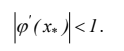

In [20]:
g = x - f/1.2
g1 = g.diff(x)

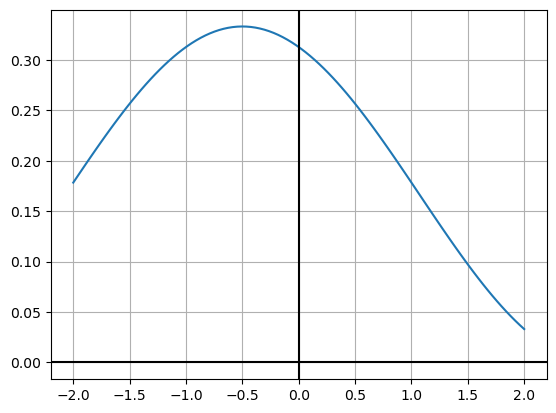

In [24]:
x_vals = np.linspace(-2, 2, 100)

f_vals = [N(g1.subs(x, val)) for val in x_vals]

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals)


plt.grid()
ax.axhline(0, color='black', lw=1.5)
ax.axvline(0, color='black', lw=1.5)

plt.show()

### На графіку видно, що в околі кореня ітераційний процес для всіх x∈ [ -0.4, 0.4] збігається

In [61]:
# Визначаємо початкове наближення x0
x0 = 1.5

# Визначаємо точність
epsilon = 0.001

iteration = 0

# Використовуємо метод простої ітерації
x_prev = x0
x_next = g.subs(x, x_prev)

while abs(x_next - x_prev) > epsilon:
    x_prev = x_next
    x_next = g.subs(x, x_prev)
    iteration += 1
    print('Ітерація:', iteration)
    print(x_next)

Ітерація: 1
0.197639794799112
Ітерація: 2
0.140008417479321
Ітерація: 3
0.122868435074169
Ітерація: 4
0.117705959927924
Ітерація: 5
0.116145420571091
Ітерація: 6
0.115673185546425


# Метод хорд

### Цей метод забезпечує збіжність до кореня функції f(x), якщо функція є неперервною та монотонно зростає або спадає на відрізку, що містить корінь.

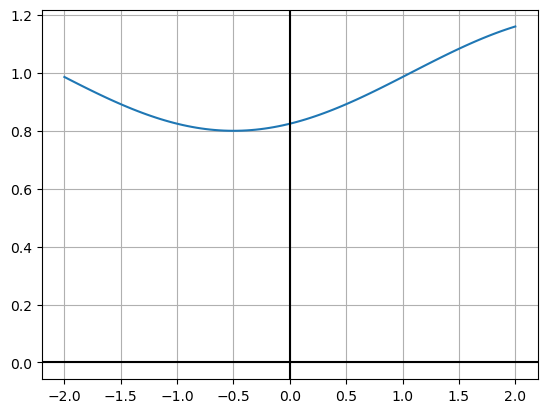

In [28]:
x_vals = np.linspace(-2, 2, 100)

f_vals = [N(f1.subs(x, val)) for val in x_vals]

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals)


plt.grid()
ax.axhline(0, color='black', lw=1.5)
ax.axvline(0, color='black', lw=1.5)

plt.show()

### На інтервалі ізоляції кореня x∈ [ -0.4, 0.4] функція поводиться монотонно

In [64]:
# Визначаємо нерухому точку C
C = 0.5

# Визначаємо початкове наближення x1
x1 = 1.5

# Визначаємо точність
epsilon = 0.001
iteration = 0

# Використовуємо метод хорд з нерухомою точкою
while abs(f.subs(x, x1)) > epsilon:
    x_next = C - f.subs(x, C) * (x1 - C) / (f.subs(x, x1) - f.subs(x, C))
    x1 = x_next
    iteration += 1
    print('Ітерація:', iteration)
    print(x_next)

Ітерація: 1
0.163732633149548
Ітерація: 2
0.116938817748910
Ітерація: 3
0.115512383913309


                                                Кількість ітерацій
## EPSILON = 0.01
   ### Метод Ньютона :                                                  3
   ### Метод простої ітерації :                                      6
   ### Метод Хорд :                                                         3

## EPSILON = 0.01

   ### Метод Ньютона :                                                 2
   ### Метод простої ітерації :                                     4
   ### Метод Хорд :                                                        2

## EPSILON = 0.1

   ### Метод Ньютона :                                                 2
   ### Метод простої ітерації :                                     2
   ### Метод Хорд :                                                        1

# Завдання 4
## Проаналізувати, як впливає на кількість ітерацій вибір початкового наближення корня.


## Аналізуючи результати наших обчислень, зокрема, вплив правильного вибору початкового наближення на кількість ітерацій, можна зробити висновок, що оптимальний вибір початкового наближення до кореня дозволяє зменшити кількість ітерацій для отримання бажаної точності.

# Завдання 5 
## Скласти програми, у яких ітераційний процес закінчується по фіксованій кількості ітерацій (наприклад, n=10). Порівняти, як співвідносяться між собою результати, отримані різними методами при одній і тій же кількості ітерацій.


## Немає потреби складати програму, адже все це було передбачено у кожній із реалізації методів. Підсумовуючи, метод хорд та метод Ньютона обидва показали гарні результати, досягнувши збіжності за 3 ітерації. На відміну від цих двох методу простої ітерації знадобилося 6 кроків для досягнення результату.